# Minnesota Vikings and Crime
## The effect a Minnesota Vikings win/lose streak has on Crime in Minnesota

### Contents
- Data Preparation
- Minnesota Vikings results
- Crime in Minnesota
- Minnesota Vikings Form
- Minnesota Vikings Streaks

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [2]:
if not os.path.exists( "../../data/prep/700_NFL.csv" ):
    print("Missing dataset file")

In [3]:
nfl = pd.read_csv("../../data/prep/700_NFL.csv", index_col="kickoff", parse_dates=True)
nfl.shape

(373, 6)

Sorting the dates of the games...

In [4]:
nfl.sort_index(ascending=True)

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Bills,14,15,Broncos,Away Win,-1
2007-09-09,Chargers,14,3,Bears,Home Win,11
2007-09-09,Vikings,24,3,Falcons,Home Win,21
2007-09-16,Bears,20,10,Chiefs,Home Win,10
2007-09-16,Broncos,23,20,Raiders,Home Win,3
2007-09-16,Lions,20,17,Vikings,Home Win,3
2007-09-23,Bears,10,34,Cowboys,Away Win,-24
2007-09-23,Broncos,14,23,Jaguars,Away Win,-9
2007-09-23,Chiefs,13,10,Vikings,Home Win,3


# Minnesota Vikings

We'll look at the Minnesota Vikings..

In [5]:
vik = nfl[(nfl.values  == "Vikings")]

In [6]:
vik.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Vikings,24,3,Falcons,Home Win,21
2007-09-16,Lions,20,17,Vikings,Home Win,3
2007-09-23,Chiefs,13,10,Vikings,Home Win,3
2007-09-30,Vikings,16,23,Packers,Away Win,-7
2007-10-14,Bears,31,34,Vikings,Away Win,-3


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [7]:
vikHome = vik[vik['Home/Neutral'] == 'Vikings']

In [8]:
conditions = [
    (vikHome['PTS.1'] > vikHome['PTS']),
    (vikHome['PTS'] == vikHome['PTS.1'])]
choices = [1, 0]
vikHome['vik Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
vikHome.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,vik Res
kickoff,,,,,,,
2007-09-09,Vikings,24,3,Falcons,Home Win,21,1
2007-09-30,Vikings,16,23,Packers,Away Win,-7,-1
2007-10-28,Vikings,16,23,Eagles,Away Win,-7,-1
2007-11-04,Vikings,35,17,Chargers,Home Win,18,1
2007-11-18,Vikings,29,22,Raiders,Home Win,7,1


and now their away games...

In [10]:
vikAway = vik[vik['Visitor/Neutral'] == 'Vikings']

In [11]:
conditions = [
    (vikAway['PTS'] > vikAway['PTS.1']),
    (vikAway['PTS'] == vikAway['PTS.1'])]
choices = [1, 0]
vikAway['vik Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
vikAway.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,vik Res
kickoff,,,,,,,
2007-09-16,Lions,20,17,Vikings,Home Win,3,-1
2007-09-23,Chiefs,13,10,Vikings,Home Win,3,-1
2007-10-14,Bears,31,34,Vikings,Away Win,-3,1
2007-10-21,Cowboys,24,14,Vikings,Home Win,10,-1
2007-11-11,Packers,34,0,Vikings,Home Win,34,-1


We'll combine the 2 dataframes

In [13]:
fram1 = [vikHome, vikAway]
vikRes = pd.concat(fram1, axis = 0)

In [14]:
vikRes.tail()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,vik Res
kickoff,,,,,,,
2014-10-19,Bills,17,16,Vikings,Home Win,1,-1
2014-10-26,Buccaneers,13,19,Vikings,Away Win,-6,1
2014-11-16,Bears,21,13,Vikings,Home Win,8,-1
2014-12-14,Lions,16,14,Vikings,Home Win,2,-1
2014-12-21,Dolphins,37,35,Vikings,Home Win,2,-1


The index is sorted again

In [15]:
vikRes = vikRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

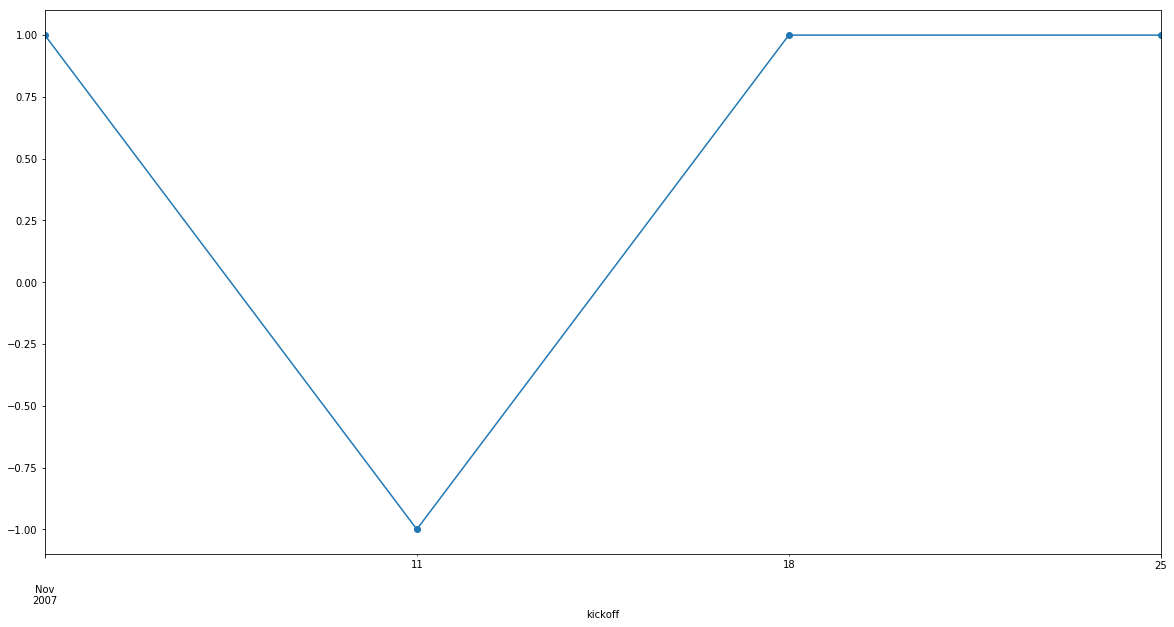

In [16]:
ctest2 = vikRes.loc['2007-11-02':'2007-11-30']
ctest2['vik Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [17]:
ctest3 = vikRes.loc['2009-11-02':'2010-06-30']
ctest3

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,vik Res
kickoff,,,,,,,
2009-11-15,Vikings,27,10,Lions,Home Win,17,1
2009-11-22,Vikings,35,9,Seahawks,Home Win,26,1
2009-11-29,Vikings,36,10,Bears,Home Win,26,1
2009-12-06,Cardinals,30,17,Vikings,Home Win,13,-1
2009-12-13,Vikings,30,10,Bengals,Home Win,20,1
2009-12-20,Panthers,26,7,Vikings,Home Win,19,-1
2009-12-28,Bears,36,30,Vikings,Home Win,6,-1
2010-01-03,Vikings,44,7,Giants,Home Win,37,1
2010-01-17,Vikings,34,3,Cowboys,Home Win,31,1


The unnecessary columns are now dropped...

In [18]:
vikRes= vikRes.drop('Visitor/Neutral', 1)
vikRes= vikRes.drop('PTS', 1)
vikRes= vikRes.drop('Home/Neutral', 1)
vikRes= vikRes.drop('PTS.1', 1)
vikRes= vikRes.drop('Result', 1)
vikRes= vikRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [19]:
start_remove = pd.to_datetime('2014-12-31')
end_remove = pd.to_datetime('2010-01-01')

In [20]:
vikRes = vikRes.loc[(vikRes.index < start_remove) & (vikRes.index > end_remove)]

In [21]:
vikRes.head()

,vik Res
kickoff,
2010-01-03,1
2010-01-17,1
2010-01-24,-1
2010-09-10,-1
2010-09-19,-1


# Minnesota Crime

We now load in the Minnesota crime dataset...

In [22]:
vikcrime = pd.read_csv( "../../data/prep/200_Minneapolis.csv", index_col="date", parse_dates=True)

Looking at crimes year by year...

<function matplotlib.pyplot.show>

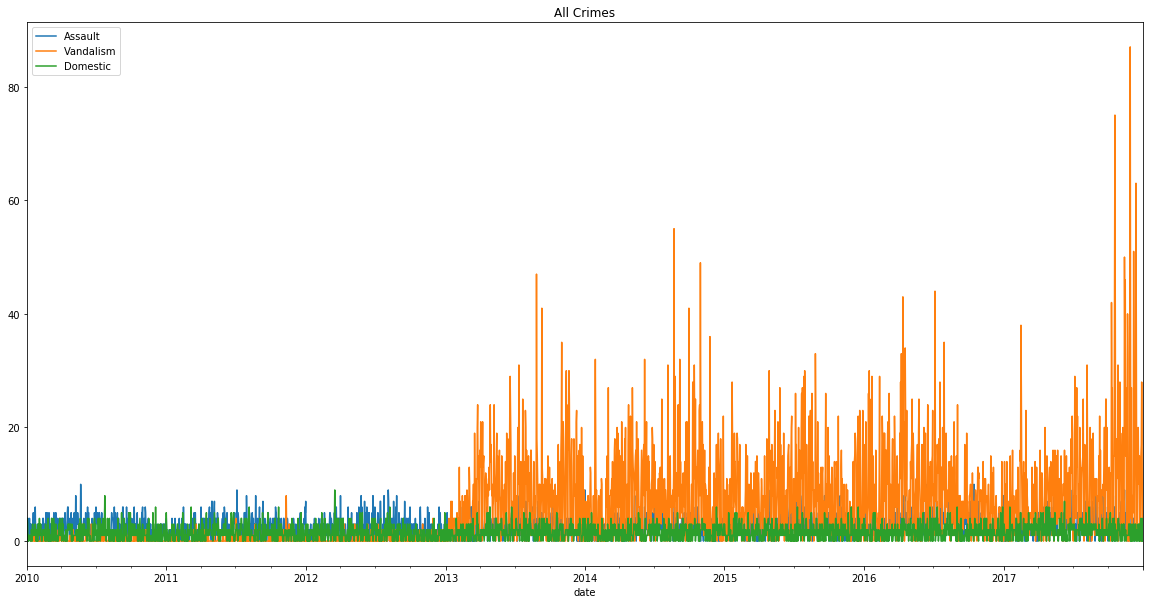

In [23]:
plt.subplot()

a1p = vikcrime[vikcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = vikcrime[vikcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = vikcrime[vikcrime['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('All Crimes')

plt.show

<function matplotlib.pyplot.show>

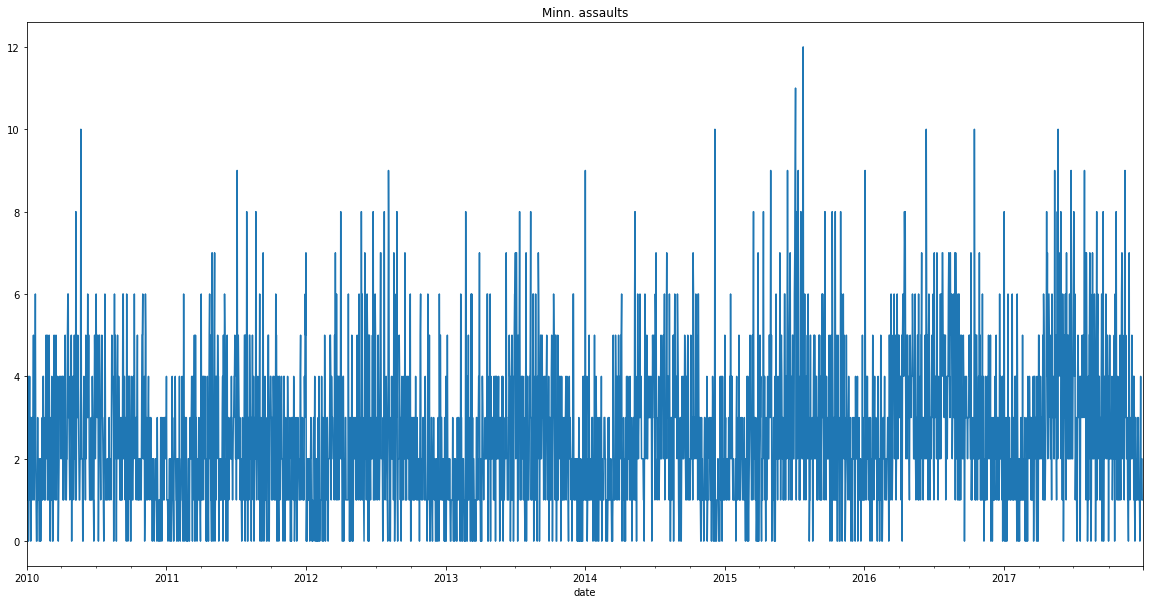

In [24]:
plt.subplot()

a1p = vikcrime[vikcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Minn. assaults')

plt.show

<function matplotlib.pyplot.show>

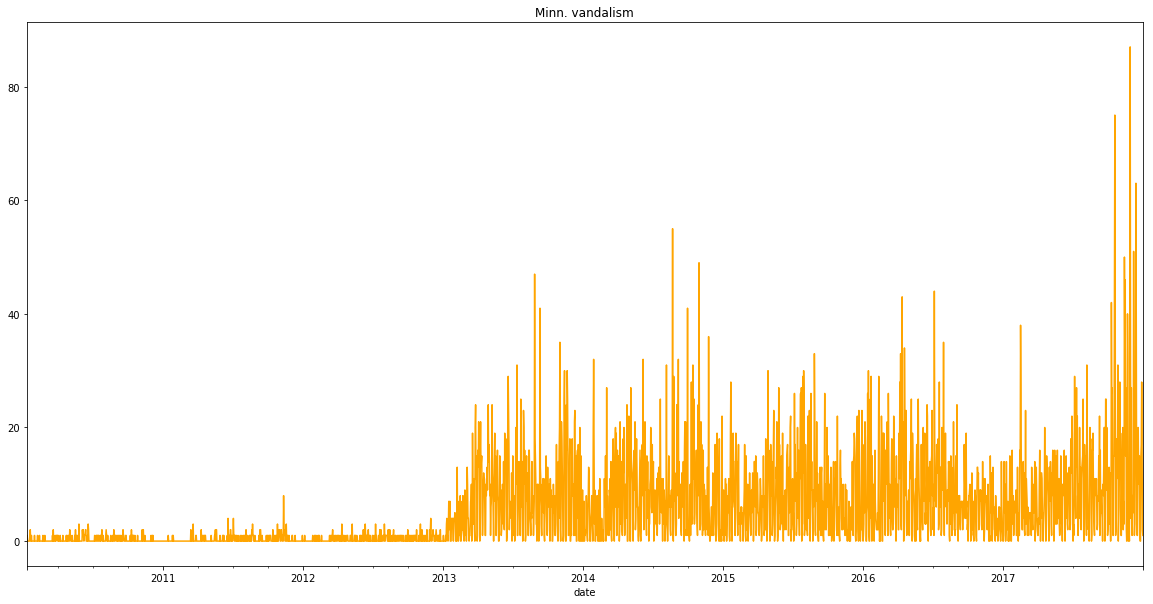

In [25]:
plt.subplot()


v1p = vikcrime[vikcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Minn. vandalism')

plt.show

<function matplotlib.pyplot.show>

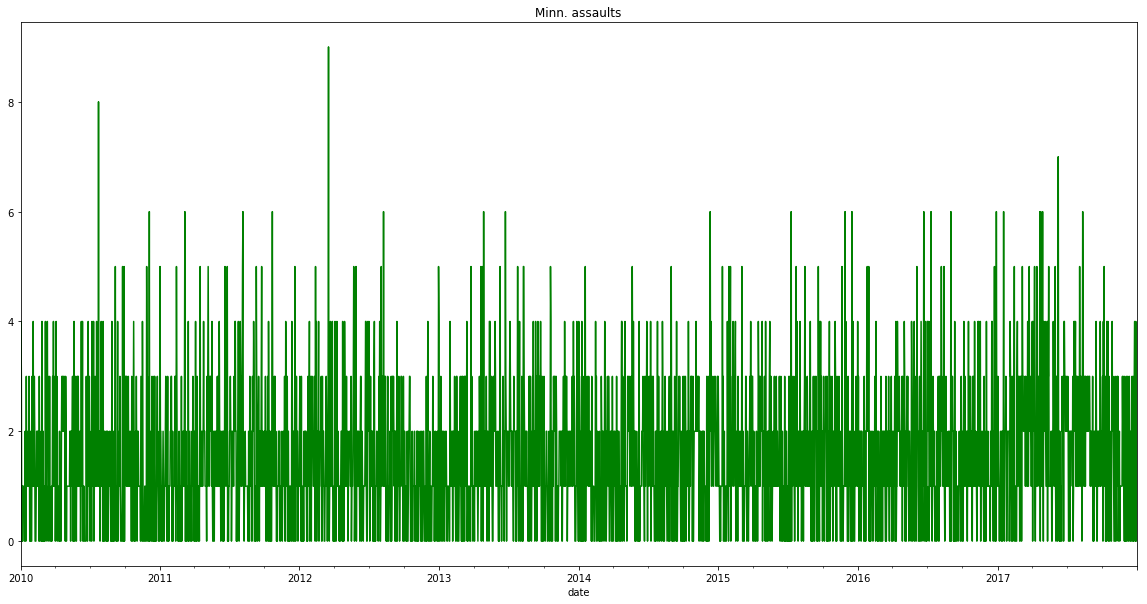

In [26]:
plt.subplot()

a1p = vikcrime[vikcrime['Description'] == "domestic violence"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Minn. assaults')

plt.show

# Crime vs Results

A day by day comparison of domestic violence violence and the games..

<function matplotlib.pyplot.show>

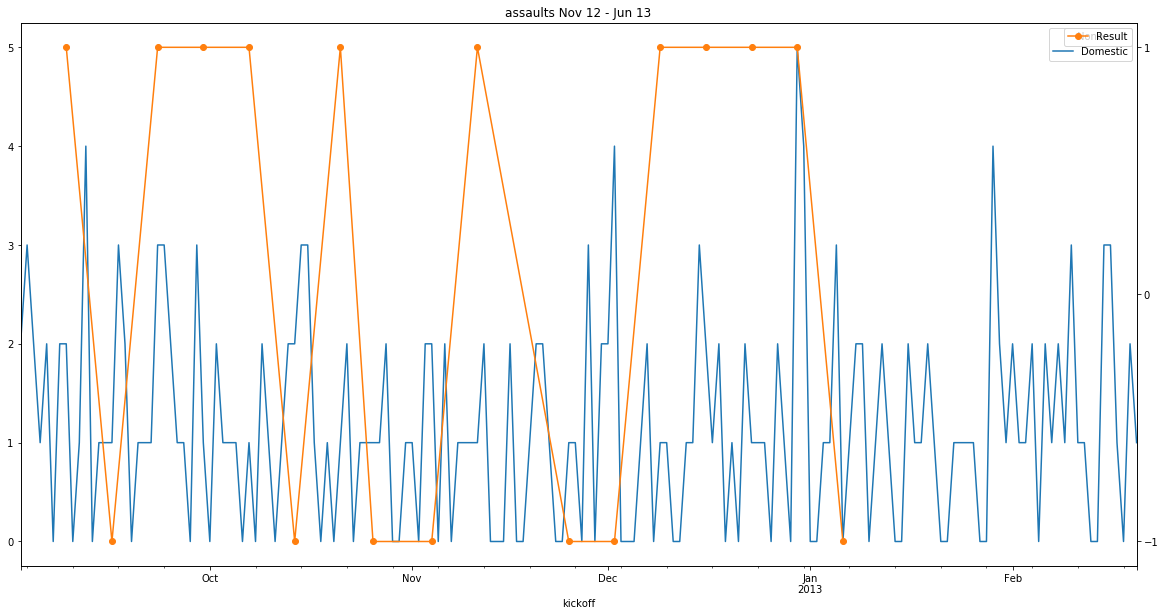

In [27]:

c1 = vikcrime.loc['2012-09-02':'2013-02-20']
ass1 = c1[c1['Description'] == "domestic violence"]['Description']
ass1.resample('D').count().plot()
plt.title('assaults Nov 12 - Jun 13')
plt.legend(['Domestic'])


ctest5 = vikRes.loc['2012-09-02':'2013-02-20']
ctest5['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Result'])
plt.show

All seasons from 2010 to 2014...

<function matplotlib.pyplot.show>

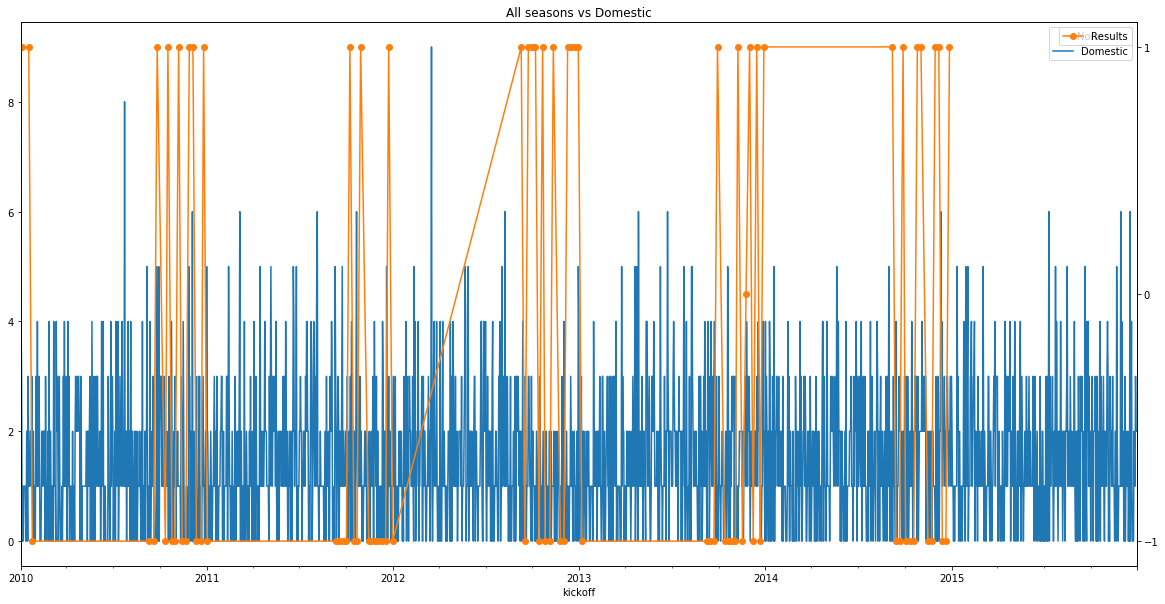

In [28]:
c1 = vikcrime.loc['2009-11-02':'2015-12-30']
ass1 = c1[c1['Description'] == "domestic violence"]['Description']
ass1.resample('D').count().plot()
plt.title('All seasons vs Domestic')
plt.legend(['Domestic'])

ctest7 = vikRes.loc['2009-11-02':'2015-12-30']
ctest7['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

# Minnesota Vikings Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between October 2011 and November 2011 when their form was -4. The highest was from December 2012 to January 2012 with a sum of 2.  

In [29]:
chMonthly = vikRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['vik Res'])
chMonthly.sort_values(by=['vik Res'])

,vik Res
kickoff,
2011-11-30,-4.0
2013-11-30,-4.0
2011-09-30,-3.0
2012-01-31,-3.0
2010-11-30,-2.0
2013-09-30,-2.0
2014-11-30,-2.0
2010-09-30,-1.0
2011-01-31,-1.0


Showing the best form with all three crimes... 

<function matplotlib.pyplot.show>

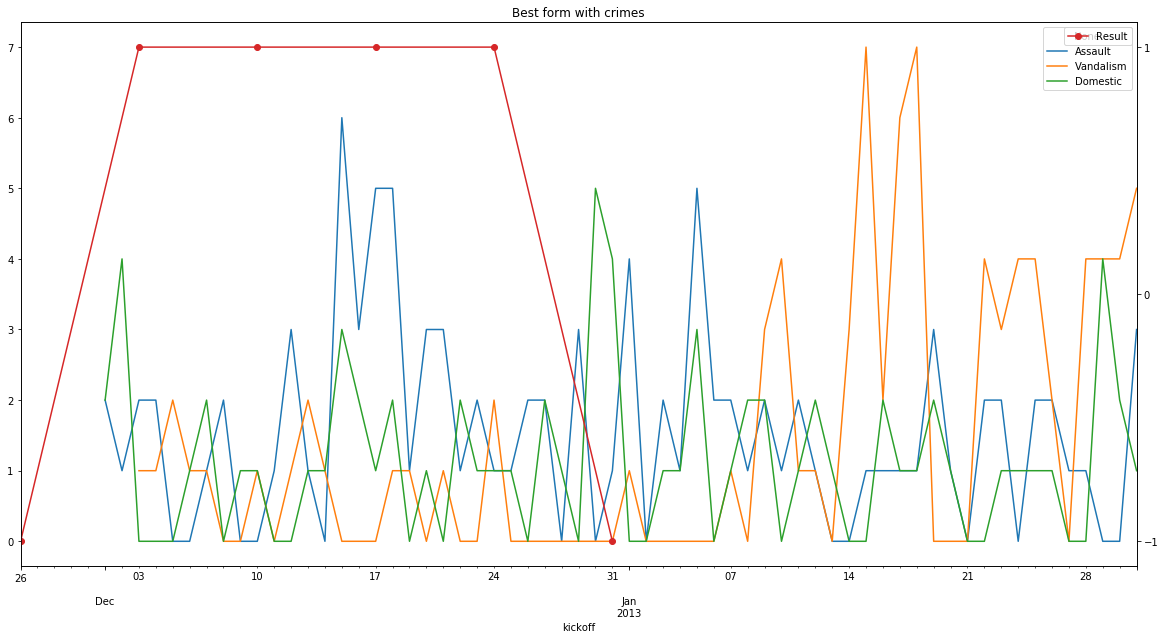

In [30]:
plt.subplot()

c = vikcrime.loc['2012-12-01':'2013-01-31']
a1 = c[c['Description'] == "assault"]['Description']
a1.resample('D').count().plot()

v1 = c[c['Description'] == "vandalism"]['Description']
v1.resample('D').count().plot()

d1 = c[c['Description'] == "domestic violence"]['Description']
d1.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Best form with crimes')

ct = vikRes.loc['2012-12-01':'2013-01-31']
ct['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))


plt.legend([ "Result"])
plt.show

Domestic is largest on the day of the loss. On three of the days when there are wins there are 0 domestic incidents, as well as 0 accounts of vandalism. 

Showing the worst form with all three crimes...

<function matplotlib.pyplot.show>

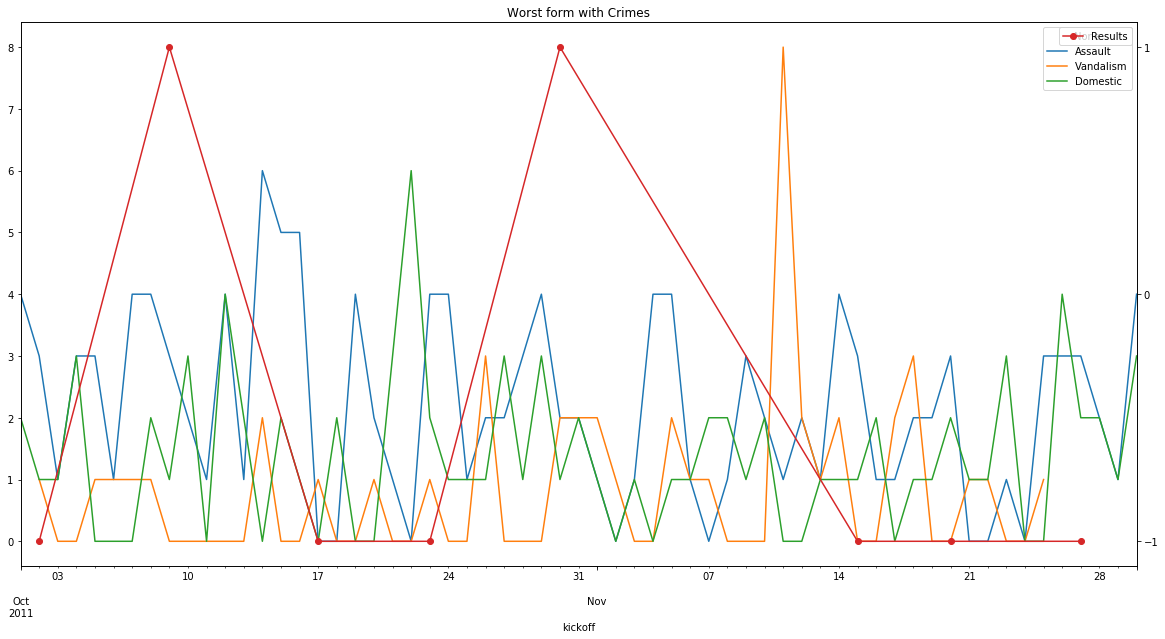

In [31]:
plt.subplot()

cp = vikcrime.loc['2011-10-01':'2011-11-30']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()

plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Worst form with Crimes')

ctp = vikRes.loc['2011-10-01':'2011-11-30']
ctp['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

Both wins see a fall in domestic incidents, and assault. 

# Minnesota Vikings Win/Lose Streaks

A function to create streak columns

In [32]:
def streaks(vikRes, col):
    sign = np.sign(vikRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return vikRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the vikRes dataframe..

In [33]:
vikRes = streaks(vikRes, 'vik Res')

In [34]:
vikRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2010-01-03 to 2014-12-28
Data columns (total 3 columns):
vik Res        84 non-null int32
lose_streak    84 non-null float64
win_streak     84 non-null float64
dtypes: float64(2), int32(1)
memory usage: 2.3 KB


Sorting the dataframe by the losing streak column..

In [35]:
vikRes.sort_values(by=['lose_streak'], ascending= False).head()

,vik Res,lose_streak,win_streak
kickoff,,,
2011-12-18,-1,6.0,0.0
2011-12-11,-1,5.0,0.0
2011-10-02,-1,5.0,0.0
2011-12-04,-1,4.0,0.0
2011-09-25,-1,4.0,0.0


<function matplotlib.pyplot.show>

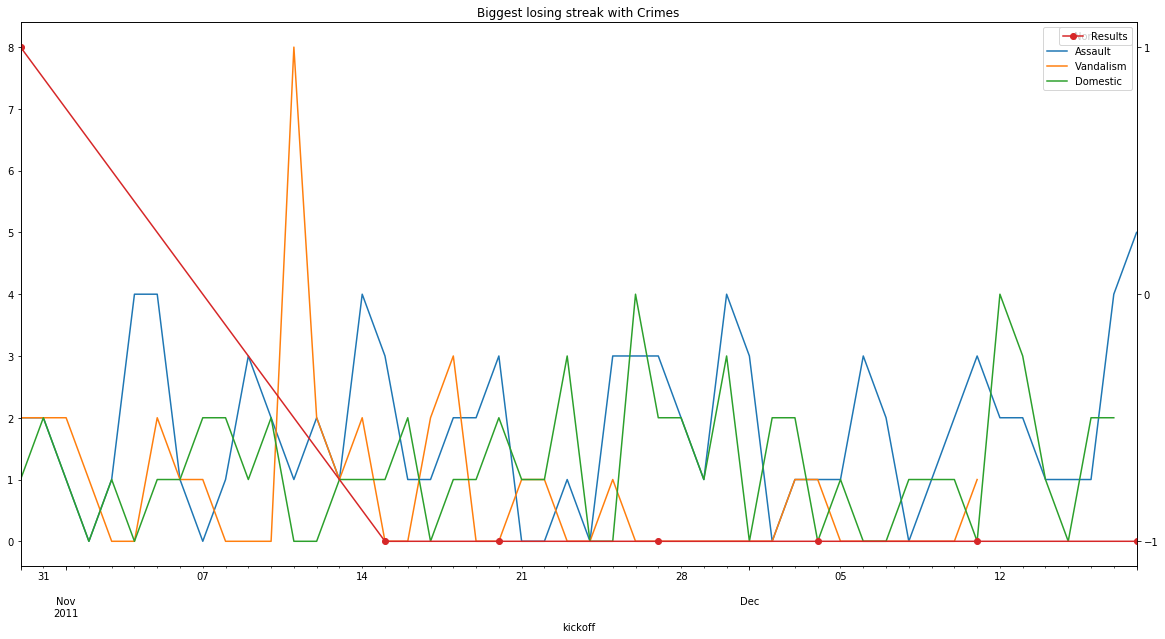

In [36]:
plt.subplot()

cp = vikcrime.loc['2011-10-30':'2011-12-18']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Biggest losing streak with Crimes')

ctp = vikRes.loc['2011-10-30':'2011-12-18']
ctp['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

Only 1/6 of the losses here does not see a rise in assaults. However, half of the losses see a fall in domestic violence. The number of vandalisms is very low during this losing streak. 

Sorting the dataframe by the win streak column

In [37]:
vikRes.sort_values(vikRes.columns[2], ascending = False).head()

,vik Res,lose_streak,win_streak
kickoff,,,
2012-12-30,1,0.0,4.0
2012-12-23,1,0.0,3.0
2012-10-07,1,0.0,3.0
2014-12-07,1,0.0,2.0
2014-11-02,1,0.0,2.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

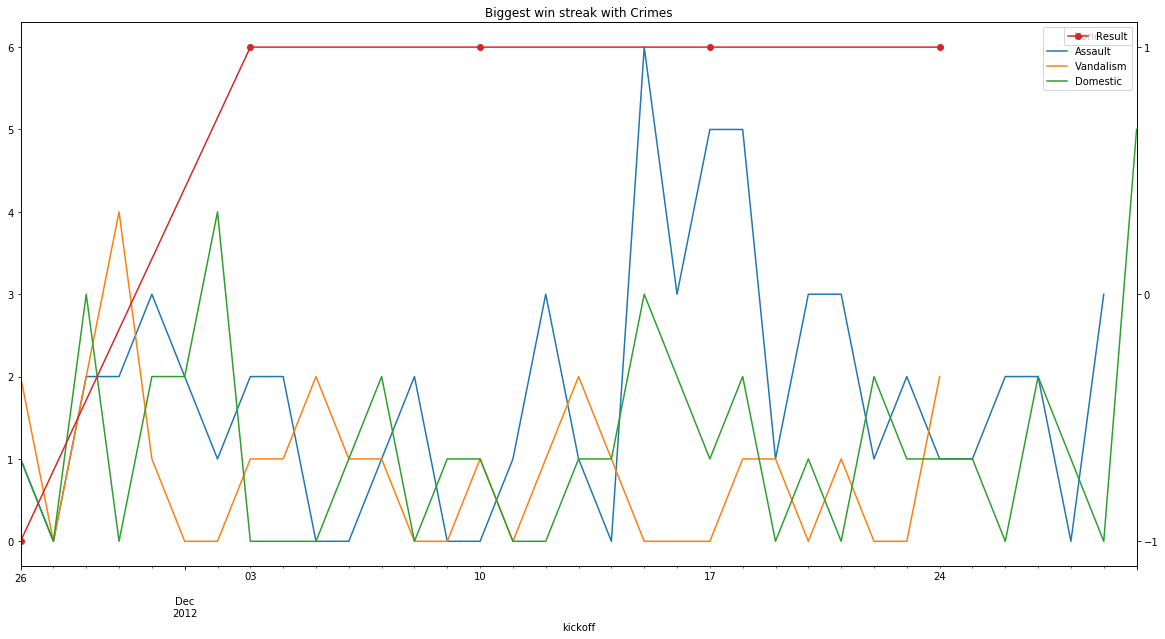

In [38]:
plt.subplot()

cp = vikcrime.loc['2012-11-26':'2012-12-30']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Biggest win streak with Crimes')

ctp = vikRes.loc['2012-11-26':'2012-12-30']
ctp['vik Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Result'])
plt.show

Only 1 out of 4 of the wins does not result in a rise in assaults. There is also spikes in the middle. There are no rises in domestic violence on the days of these wins. 

### Comapring the Longest Streaks

In [39]:
cp = vikcrime.loc['2011-10-30':'2011-12-18']

print('Daily average for Losing Streak:')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = vikcrime.loc['2012-11-26':'2012-12-30']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 1.82
Vandalism = 0.813953488372093
Domestic = 1.2244897959183674
 
Daily average for Winning Streak:
Assault = 1.7941176470588236
Vandalism = 0.8620689655172413
Domestic = 1.1714285714285715


The level of Vandalism and Domestic violence is actually larger during the win streak. Assault is marginally lower. 

### Comparison with periods before streaks

In [40]:
cp = vikcrime.loc['2012-10-22':'2012-11-26']

print('Period before Winning Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = vikcrime.loc['2012-11-26':'2012-12-30']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 2.0277777777777777
Vandalism = 0.5142857142857142
Domestic = 0.8888888888888888
 
Period of Winning Streak:
Assault = 1.7941176470588236
Vandalism = 0.8620689655172413
Domestic = 1.1714285714285715


There is a drop in assaults during the win streak. However, there is a rise in both domestic violence and vandalism. 

In [41]:
cp = vikcrime.loc['2011-09-12':'2011-10-30']

print('Period before Losing Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = vikcrime.loc['2011-10-30':'2011-12-18']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Losing Streak
Assault = 2.4081632653061225
Vandalism = 0.40816326530612246
Domestic = 1.5918367346938775
 
Period of Losing Streak:
Assault = 1.82
Vandalism = 0.813953488372093
Domestic = 1.2244897959183674


There was actually a drop in both assault and domestic violence during the losing streak. Vandalism did see a rise. 